# Forecasting Electricity Load of Houston
###  ICPE 638 - Spring 2023

[Enrique Z. Losoya](https://orcid.org/0000-0001-7763-3349), and [Jian Tao](https://orcid.org/0000-0003-4228-6089), Texas A&M University.
Updated: Jan. 3, 2023.

**(30 points)**

- Name:  Juan David Baquero Barrios
- GitHub or Google colab link: https://drive.google.com/file/d/1QxH31Qq6xYOko9HM1qjuScZ4Ylj-UcIB/view?usp=sharing

### **Data Set**
A Cross-Domain Data Hub to Track the Impact of COVID-19 on U.S. Electricity Markets

https://github.com/tamu-engineering-research/COVID-EMDA

Particularly, we will use the electricity load data of Houston.

https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv

### **Problem**
1. Carry out component decomposition for the electricity load of Houston

2. Perform KPSS and ADF Stationarity Tests, explain your results. 

3. Build an ARIMA model with an optimal order (p, d, q)
   
4.  *(Extra credit)* Make a prediction for the next 30 days, plot it out, and explain your results.

## Download and Process Dataset
**Please don't change this section!**

You can use the dataframe `df` for the rest of your analysis.

In [3]:
DATA_URL="https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv"

In [4]:
# import pandas, numpy and seaborn. sns.set() will set multiple theme parameters in one step for seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [5]:
# read the data and change the index to datetime index to facilitate the analysis.
df=pd.read_csv(DATA_URL)
df["date"] = pd.to_datetime(df["date"])
df.set_index(pd.to_datetime(df.date, format="%Y-%m-%d"), inplace=True)
df.drop(["date"], axis=1, inplace=True)
df.head(5)

,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,8791.8,8569.7,8326.4,8137.5,8011.9,7978.1,8057.1,8125.8,8289.2,8646.5,...,9957.6,9987.9,9943.9,10181.0,10583.5,10451.0,10230.6,10014.8,9667.7,9287.7
2017-01-02,8836.8,8588.2,8480.8,8506.0,8644.7,8887.0,9176.5,9323.8,9559.9,9602.7,...,10937.1,11037.0,10931.5,10859.0,11112.1,10893.9,10594.2,10196.7,9568.1,8935.5
2017-01-03,8516.6,8238.2,8102.8,8094.3,8265.7,8816.3,9615.5,10009.8,10102.3,10235.3,...,11022.6,10988.9,10883.8,10882.0,11092.8,10889.1,10577.2,10100.1,9488.8,8916.9
2017-01-04,8462.0,8316.5,8259.6,8336.3,8636.6,9357.1,10504.8,10955.0,10944.0,11119.8,...,10713.0,10602.9,10638.3,11099.4,11605.9,11578.6,11416.8,11010.9,10392.6,9784.5
2017-01-05,9472.0,9198.3,9051.1,9031.1,9237.9,9836.5,10685.2,10931.8,10841.5,10912.8,...,10692.5,10696.2,10791.9,11130.9,11378.8,11311.2,11194.9,10882.2,10416.8,9959.7


In [6]:
df['load']= df.sum(axis=1)
df = df[["load"]]
df.head(5)

,load
date,
2017-01-01,220989.4
2017-01-02,235680.6
2017-01-03,237534.1
2017-01-04,247560.4
2017-01-05,251129.3


In [67]:
df.tail(5)

,load
date,
2021-11-26,250892.4
2021-11-27,252661.7
2021-11-28,252618.8
2021-11-29,267948.6
2021-11-30,269260.3


In [76]:
df['load'][900:]

date
2019-06-20    383068.8
2019-06-21    392740.1
2019-06-22    376575.3
2019-06-23    377362.0
2019-06-24    342534.9
                ...   
2021-11-26    250892.4
2021-11-27    252661.7
2021-11-28    252618.8
2021-11-29    267948.6
2021-11-30    269260.3
Name: load, Length: 893, dtype: float64

In [80]:
df['load'][:900]

date
2017-01-01    220989.4
2017-01-02    235680.6
2017-01-03    237534.1
2017-01-04    247560.4
2017-01-05    251129.3
                ...   
2019-06-15    358417.1
2019-06-16    328829.7
2019-06-17    323592.2
2019-06-18    367918.6
2019-06-19    386395.5
Name: load, Length: 900, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1793 entries, 2017-01-01 to 2021-11-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   load    1793 non-null   float64
dtypes: float64(1)
memory usage: 28.0 KB


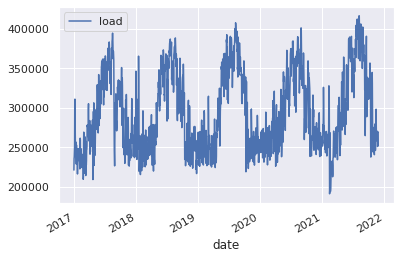

In [8]:
df.plot()

## Component Decomposition

In [ ]:
df_weekly_mean = df[["load"]].resample("w").mean(); df_weekly_mean

In [ ]:
df_weekly_mean.plot()

In [24]:
df_diff_d=df.diff(periods=1)

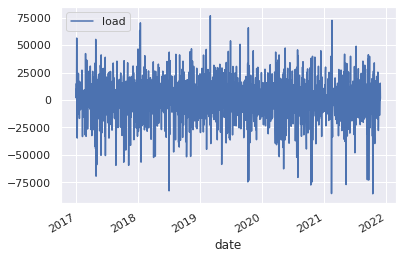

In [26]:
df_diff_d.plot()

In [27]:
df_diff_d=df_diff_d[2:]

In [29]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

**KPSS test** p-value is 0.1, which less than all the critial values. The null hypothesis can be rejected. Hence the series is non-stationary.

In [31]:
kpss_test(df_diff_d["load"])

Results of KPSS Test:
Test Statistic            0.03599
p-value                   0.10000
Lags Used                25.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


**ADF Test** p-value is 1*10^-22 which is higher than all the critical values , which less than 10% confidence level. The null hypothesis can be rejected. Hence the series is non-stationary.

In [32]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [33]:
adf_test(df_diff_d["load"])

Results of Dickey-Fuller Test:
Test Statistic                -1.217527e+01
p-value                        1.390888e-22
#Lags Used                     2.200000e+01
Number of Observations Used    1.768000e+03
Critical Value (1%)           -3.434054e+00
Critical Value (5%)           -2.863176e+00
Critical Value (10%)          -2.567641e+00
dtype: float64


This **ACF and PACF** graphs represents a patter of a non stationary time series of load,  due they do not show any significant correlation at higher lags, and the values of the patterns are in the variance of the graphic. It represents that do not have a change depending in the season.


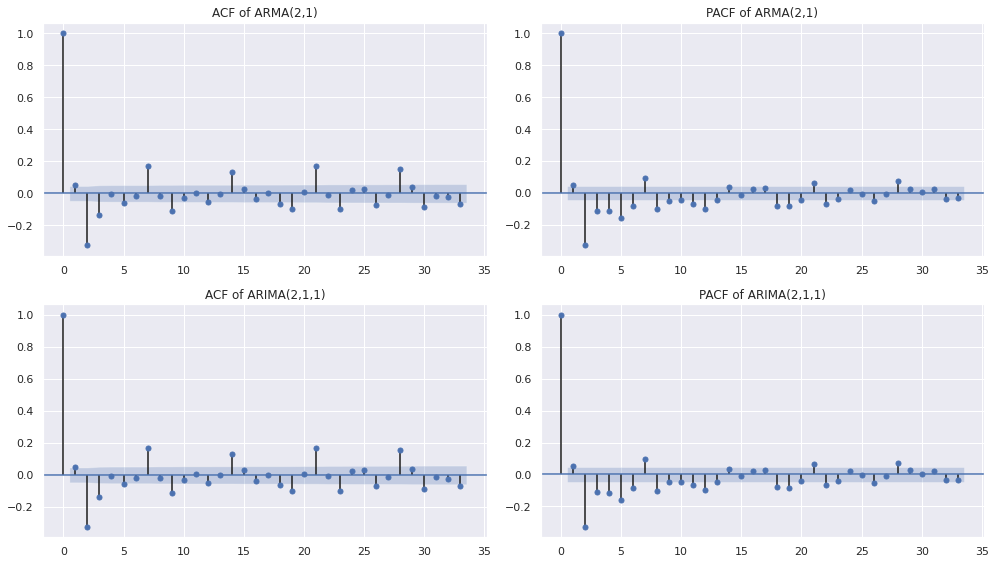

In [38]:
import matplotlib.gridspec as gridspec
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(tight_layout = True, figsize = (14, 8))
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0,0])
plot_acf(df_diff_d["load"],title='ACF of ARMA(2,1)', ax = ax)
ax = fig.add_subplot(gs[0,1])
plot_pacf(pd.DataFrame(df_diff_d["load"]),title='PACF of ARMA(2,1)',ax = ax)
ax = fig.add_subplot(gs[1,0])
plot_acf(df_diff_d["load"],title='ACF of ARIMA(2,1,1)',ax = ax)
ax = fig.add_subplot(gs[1,1])
plot_pacf(df_diff_d["load"],title='PACF of ARIMA(2,1,1)',ax = ax)
plt.show()

##   ARIMA Model with optimal order (p, d, q)

In [123]:
from statsmodels.tsa.arima.model import ARIMA

# Split sample. Use the first 200 data points in my_arima_array as training data and the last 50 as test data. 
my_arima_array_train = df_diff_d["load"][:1400] 
my_arima_array_test = df_diff_d["load"][1400:]

# fit the ARIMA model
model = ARIMA(my_arima_array_train,order=(2, 1, 3))
model_fit = model.fit()

# print the fitting result
print(model.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                 1400
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -15653.978
Date:                Mon, 16 Jan 2023   AIC                          31319.955
Time:                        02:52:47   BIC                          31351.416
Sample:                    01-03-2017   HQIC                         31331.716
                         - 11-02-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3695      0.078      4.745      0.000       0.217       0.522
ar.L2         -0.0488      0.071     -0.690      0.490      -0.187       0.090
ma.L1         -1.3913      0.076    -18.312      0.0

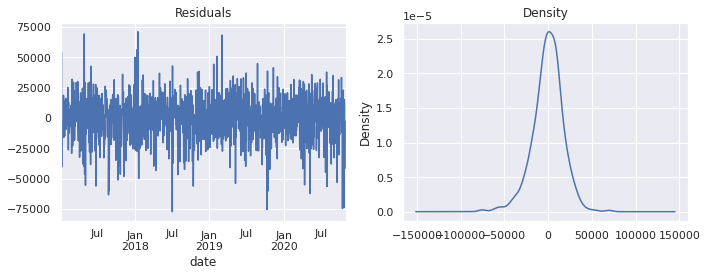

In [124]:
residuals = pd.DataFrame(model.fit().resid)

# Generate the residual plot
fig = plt.figure(tight_layout = True, figsize = (10, 4))
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0,0])
residuals.plot(title="Residuals",ax=ax, legend=False)
ax = fig.add_subplot(gs[0,1])
residuals.plot(kind='kde',title='Density',ax=ax,legend = False)
plt.show()

There is a constant mean of variance and covriance in the plots Autocorrelation and Partial correlation, so the model is adequate

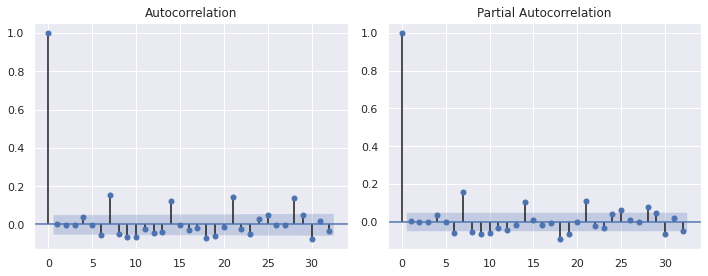

In [125]:
fig = plt.figure(tight_layout = True, figsize = (10, 4))
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0,0])
plot_acf(residuals,ax = ax)
ax = fig.add_subplot(gs[0,1])
plot_pacf(residuals,ax = ax)
plt.show()

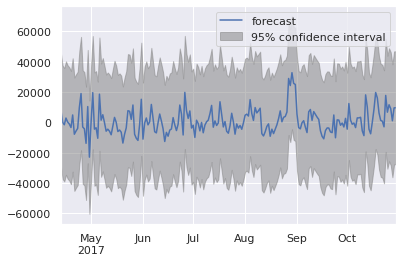

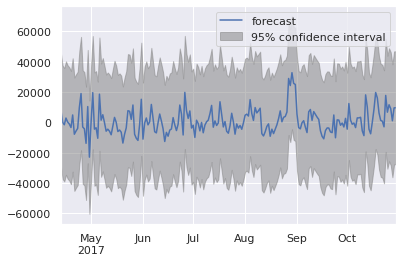

In [130]:
from statsmodels.tsa import arima_model
from statsmodels.graphics.tsaplots import plot_predict
 
# True values vs predicted by model 

results = model.fit() 
plot_predict(results, 100, 300, dynamic=False)

In [118]:
import itertools
def arima_order(data, order=10, verbose=True):
  p=d=q=range(0,order)
  pdq = list(itertools.product(p,d,q))
  warnings.filterwarnings("ignore")
  aic_pair={}
  min_aic=9999999
  min_order=(0,0,0)
  for o in pdq:
    try:
      model_arima = ARIMA(data, order=o)
      model_arima_fit=model_arima.fit()
      fit_aic = model_arima_fit.aic
      if verbose: print(o, "AIC=", fit_aic)
      if not np.isnan(fit_aic):
        if min_aic>fit_aic:
          min_aic = fit_aic
          min_order=o
      aic_pair.update({o, rmodel_arima_fit.aic})
    except:
      continue
  return min_order

In [119]:
arima_order(df_diff_d["load"], order=4)

(0, 0, 0) AIC= 51985.367491465346
(0, 0, 1) AIC= 40349.802862647615
(0, 0, 2) AIC= 40111.65304804666
(0, 0, 3) AIC= 40055.91983118744
(0, 1, 0) AIC= 41484.05485867349
(0, 1, 1) AIC= 40360.67825913404
(0, 1, 2) AIC= 40345.42748361486
(0, 1, 3) AIC= 40141.91856527359
(0, 2, 0) AIC= 43175.23621908178
(0, 2, 1) AIC= 41502.45479392297
(0, 2, 2) AIC= 40344.254131387315
(0, 2, 3) AIC= 40601.89304721213
(0, 3, 0) AIC= 45119.820730927444
(0, 3, 1) AIC= 43160.7835219498
(0, 3, 2) AIC= 41483.79996295975
(0, 3, 3) AIC= 41460.14491971793
(1, 0, 0) AIC= 40357.23852207491
(1, 0, 1) AIC= 40212.644167989674
(1, 0, 2) AIC= 40057.51480945868
(1, 0, 3) AIC= 40056.894072792296
(1, 1, 0) AIC= 41313.68900778846
(1, 1, 1) AIC= 40342.447619163344
(1, 1, 2) AIC= 40285.47845916428
(1, 1, 3) AIC= 40053.23229937109
(1, 2, 0) AIC= 42655.09734237523
(1, 2, 1) AIC= 41300.121013523494
(1, 2, 2) AIC= 41472.31194220666
(1, 2, 3) AIC= 40347.62224314176
(1, 3, 0) AIC= 44228.393137443476
(1, 3, 1) AIC= 42680.39711263974
(1

(2, 1, 3)

##   ARIMA Model Forecasting (Extra)

In [131]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa import arima_model
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
import warnings

my_arima_array_train = df_diff_d["load"][:1400] 
my_arima_array_test = df_diff_d["load"][1400:]

model = ARIMA(my_arima_array_train,order=(2, 1, 3))
model_fit = model.fit()


In [132]:
model_arima_fit=model.fit()
print(model_arima_fit.aic)

31319.955159387493


ValueError: ignored

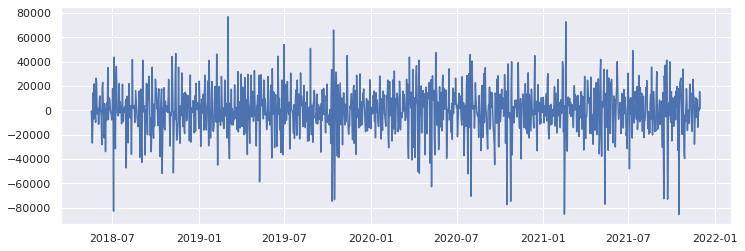

In [152]:
n_pred = 30 # Lead time, or forecasting horizon -- the number of steps ahead for out of sample forecast 
result = model.fit().forecast(steps=n_pred,alpha=0.05)
pred_array = result[0]
se_array = result[1]
CI_array = result[2]
plt.figure(figsize=(12,4))
pred_array_index = range(1300,1800)
plt.plot(df_diff_d["load"][500:])
plt.plot(pred_array_index, pred_array, color = "red")
plt.fill_between(pred_array_index, CI_array[:,0], CI_array[:,1], color = "k", alpha = .03 )
plt.title('Forecast of the simulated data')
plt.show()